**ESERCITAZIONE 3:**

E' riportata l'analisi dati dell'esercizio dell'Esercizio 3

**Esercizio 3.1:** Considero il problema di un'Opzione Europea, sia il caso di una Call che il caso di una Put, stimando i rispettivi prezzi dei diritti $C(T)$ e $P(T)$ per contratti con una expirty date $T$ e un prezzo di contratto fissato $K$. Il prezzo $C(T)$ associato al diritto della Call Option sarà dato dal valore di aspettazione del massimo tra $0$ e $S(T) - K$:
$ \\ C(t) = < e^{-rT} max(0, S(T) - K ) >$ $\\$ 
Analogamente, il prezzo della Put Option sarà: 
$ \\ P(t) = < e^{-rT} max(0, K - S(T)) >$
Per definire queste quantità, il prezzo spot è stato stimato 2500 volte con un metodo Montecarlo, generando numeri pseudocasuali $z$ tra $[0,1]$ con distribuzione normale e utilizzando il modello di Moto Browniano Geometrico:
$S(t_{i+1}) = S(t_i) e^{(r - 0.5 \sigma^2)(t_{i+1} - t_i) + \sigma  \sqrt{t_{i+1}-t_i}z}$
Si ripete lo stesso procedimento su 50 blocchi, al fine di poter definire una statistica sulle quantità $C(T)$ e $P(T)$.
Infatti, si calcola la media delle due quantità al variare del numero di blocchi inclusi nell'analisi, con associata la deviazione standard della media.

Si sono utilizzati i seguenti parametri:
Strike price $K = 100$;
Prezzo iniziale $S(0) = 100$; 
Volatilià $\sigma = 0.25$; 
Tasso di interesse $r = 0.1$; 
Expiry date $T = 1$;


La prima parte dell'esercizio è svolta calcolando direttamente $S(T)$ e $P(T)$:

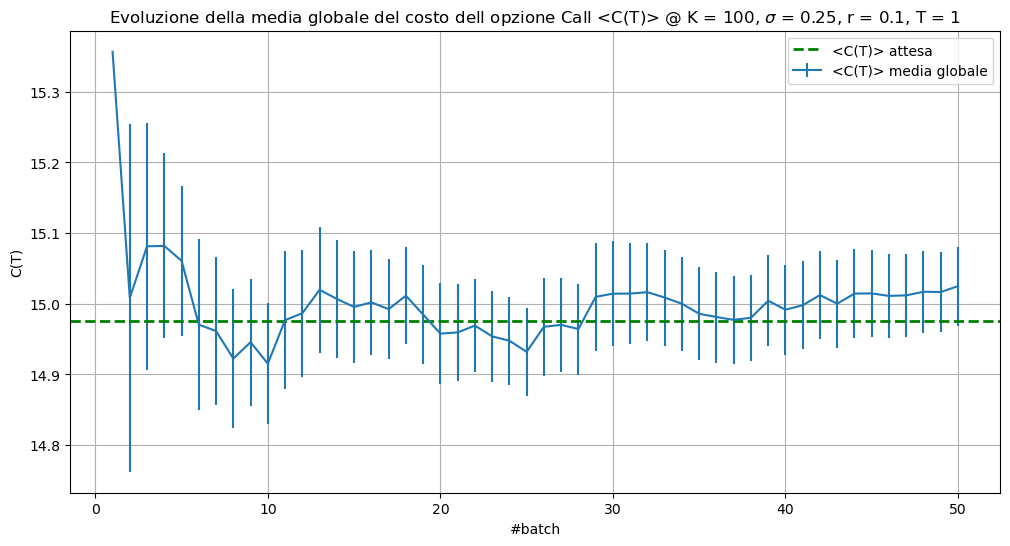

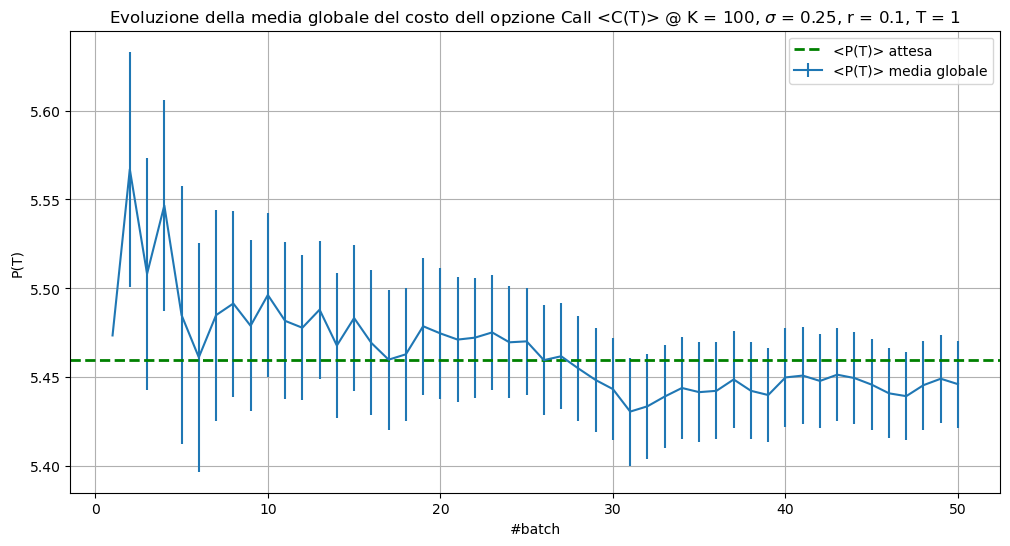

In [1]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lettura file
filename = "Call-Option.txt"
CALL = pd.read_table(filename, delimiter = "\t" , usecols=(0,1) , names = ('Call' , 'Stdev_Call') )

filename = "Put-Option.txt"
PUT = pd.read_table(filename, delimiter = "\t" , usecols=(0,1) , names = ('Put' , 'Stdev_Put') )

#estrarre i dati dalle colonne del file di testo
CALL['Call'] = pd.to_numeric(CALL['Call'] , errors = 'coerce')
CALL['Stdev_Call'] = pd.to_numeric(CALL['Stdev_Call'] , errors = 'coerce')

PUT['Put'] = pd.to_numeric(PUT['Put'] , errors = 'coerce')
PUT['Stdev_Put'] = pd.to_numeric(PUT['Stdev_Put'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Call_vector = CALL['Call']
Stdev_Call_vector = CALL['Stdev_Call']

Put_vector = PUT['Put']
Stdev_Put_vector = PUT['Stdev_Put']

#generare Array di interi da 1 a N
N = 50;
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media) relativo alla variabile Call C(T) 
plt.figure(figsize = (12,6))
plt.title('Evoluzione della media globale del costo dell opzione Call <C(T)> @ K = 100, $\sigma$ = 0.25, r = 0.1, T = 1')
plt.errorbar(N_vector, Call_vector, yerr = Stdev_Call_vector, label = '<C(T)> media globale')
plt.axhline(y = 14.975790778311286, color = 'green', linestyle = '--', linewidth = 2, label = '<C(T)> attesa')
plt.xlabel('#batch')
plt.ylabel('C(T)')
plt.legend()
plt.grid(True)
plt.show()

#disegnare grafico di media con barre d'errore (deviazione standard della media) relativo alla variabile Put P(T) 
plt.figure(figsize = (12,6))
plt.title('Evoluzione della media globale del costo dell opzione Put <P(T)> @ K = 100, $\sigma$ = 0.25, r = 0.1, T = 1')
plt.errorbar(N_vector, Put_vector, yerr = Stdev_Put_vector, label = '<P(T)> media globale')
plt.axhline(y = 5.4595325819072364, color = 'green', linestyle = '--', linewidth = 2, label = '<P(T)> attesa')
plt.xlabel('#batch')
plt.ylabel('P(T)')
plt.legend()
plt.grid(True)
plt.show()

Si ripete lo stesso procedimento campionando lo spot price $S(T)$ come successione di iterazioni discrete con intervallo temporale $0.01 T$:

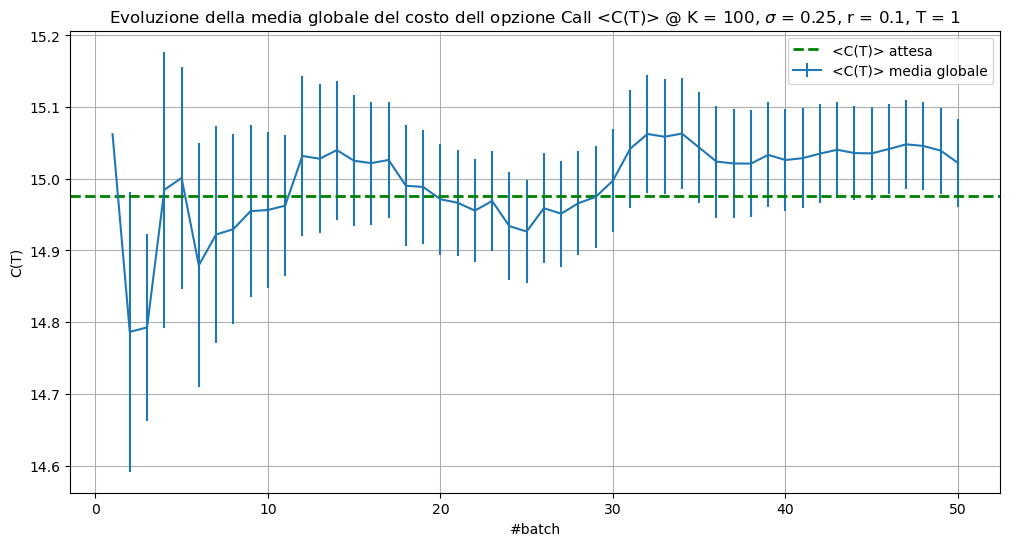

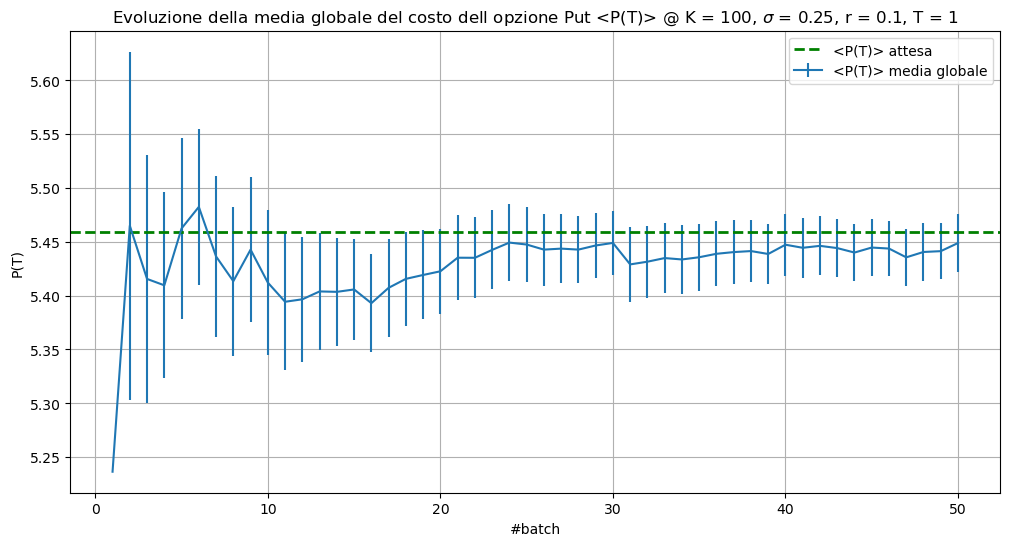

In [3]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lettura file
filename = "Call-Option-progressive.txt"
CALL = pd.read_table(filename, delimiter = "\t" , usecols=(0,1) , names = ('Call' , 'Stdev_Call') )

filename = "Put-Option-progressive.txt"
PUT = pd.read_table(filename, delimiter = "\t" , usecols=(0,1) , names = ('Put' , 'Stdev_Put') )

#estrarre i dati dalle colonne del file di testo
CALL['Call'] = pd.to_numeric(CALL['Call'] , errors = 'coerce')
CALL['Stdev_Call'] = pd.to_numeric(CALL['Stdev_Call'] , errors = 'coerce')

PUT['Put'] = pd.to_numeric(PUT['Put'] , errors = 'coerce')
PUT['Stdev_Put'] = pd.to_numeric(PUT['Stdev_Put'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Call_vector = CALL['Call']
Stdev_Call_vector = CALL['Stdev_Call']

Put_vector = PUT['Put']
Stdev_Put_vector = PUT['Stdev_Put']

#generare Array di interi da 1 a N
N = 50;
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media) relativo alla variabile Call C(T) 
plt.figure(figsize = (12,6))
plt.title('Evoluzione della media globale del costo dell opzione Call <C(T)> @ K = 100, $\sigma$ = 0.25, r = 0.1, T = 1')
plt.errorbar(N_vector, Call_vector, yerr = Stdev_Call_vector, label = '<C(T)> media globale')
plt.axhline(y = 14.975790778311286, color = 'green', linestyle = '--', linewidth = 2, label = '<C(T)> attesa')
plt.xlabel('#batch')
plt.ylabel('C(T)')
plt.legend()
plt.grid(True)
plt.show()

#disegnare grafico di media con barre d'errore (deviazione standard della media) relativo alla variabile Put P(T) 
plt.figure(figsize = (12,6))
plt.title('Evoluzione della media globale del costo dell opzione Put <P(T)> @ K = 100, $\sigma$ = 0.25, r = 0.1, T = 1')
plt.errorbar(N_vector, Put_vector, yerr = Stdev_Put_vector, label = '<P(T)> media globale')
plt.axhline(y = 5.4595325819072364, color = 'green', linestyle = '--', linewidth = 2, label = '<P(T)> attesa')
plt.xlabel('#batch')
plt.ylabel('P(T)')
plt.legend()
plt.grid(True)
plt.show()

I valori attesi delle opzioni, riportati nei grafici dalle rette orizzontali tratteggiate, sono quelli ottenuti con le soluzioni analitiche di Black-Scholes.